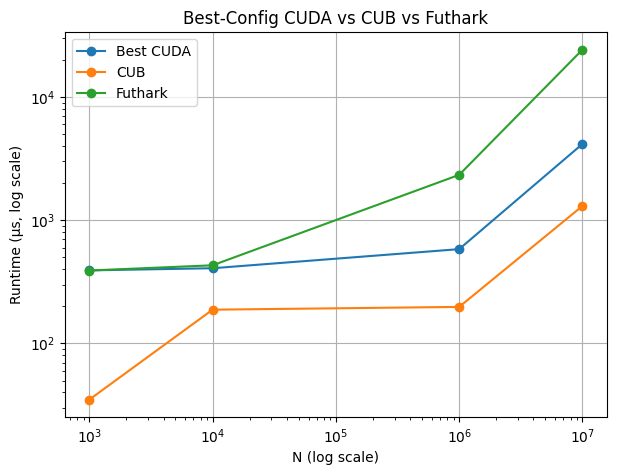

           N   Q    B  NUM_BITS  CUDA (µs)
6       1000   1  256         8        392
27     10000   1  256         8        408
62   1000000  23  256         8        583
74  10000000  23  128         4       4166


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")

# Get best CUDA config per N
best = df.loc[df.groupby("N")["CUDA (µs)"].idxmin()]

plt.figure(figsize=(7,5))
plt.plot(best["N"], best["CUDA (µs)"], marker="o", label="Best CUDA")
plt.plot(best["N"], best["Cub (µs)"], marker="o", label="CUB")
plt.plot(best["N"], best["Futhark (µs)"], marker="o", label="Futhark")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("N (log scale)")
plt.ylabel("Runtime (µs, log scale)")
plt.title("Best-Config CUDA vs CUB vs Futhark")
plt.grid(True)
plt.legend()
plt.show()


print(best[["N","Q","B","NUM_BITS","CUDA (µs)"]])

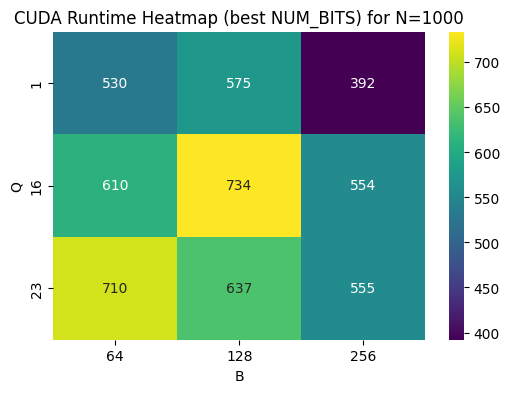

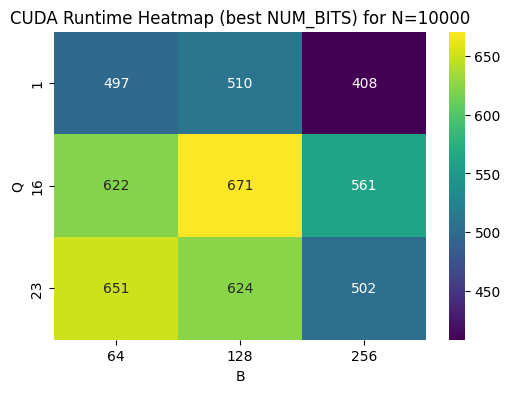

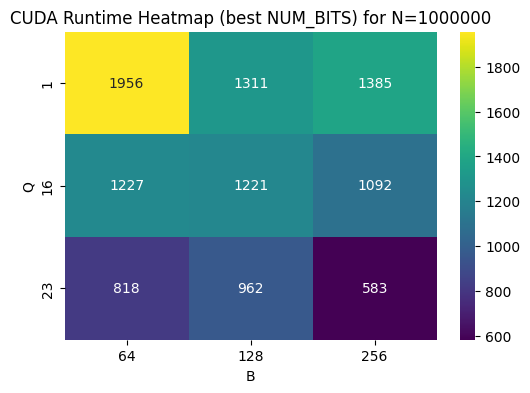

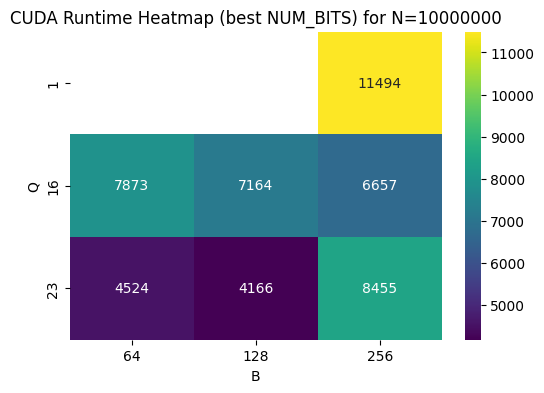

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")

# Pick the best CUDA configuration per N, Q, B (minimum time)
df_bestbits = df.loc[df.groupby(["N","Q","B"])["CUDA (µs)"].idxmin()]

for N in df_bestbits["N"].unique():
    sub = df_bestbits[df_bestbits["N"] == N]
    pivot = sub.pivot(index="Q", columns="B", values="CUDA (µs)")
    
    plt.figure(figsize=(6,4))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis")
    plt.title(f"CUDA Runtime Heatmap (best NUM_BITS) for N={N}")
    plt.xlabel("B")
    plt.ylabel("Q")
    plt.show()


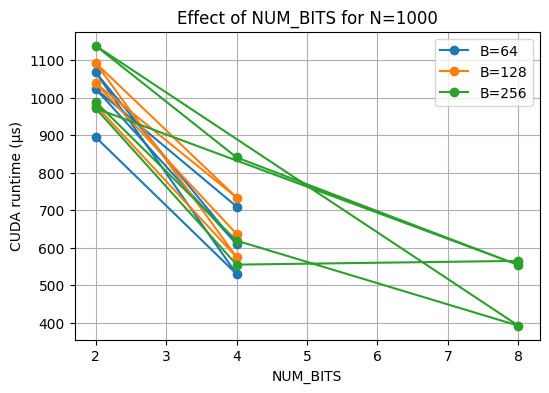

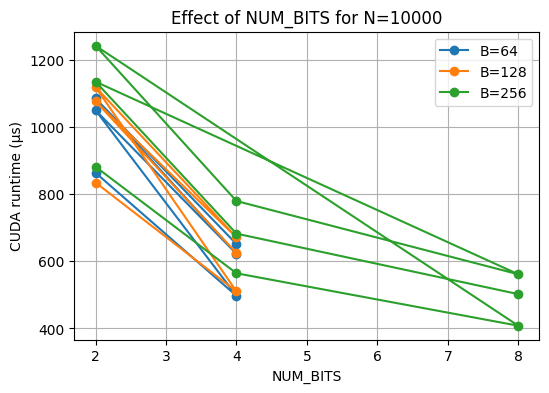

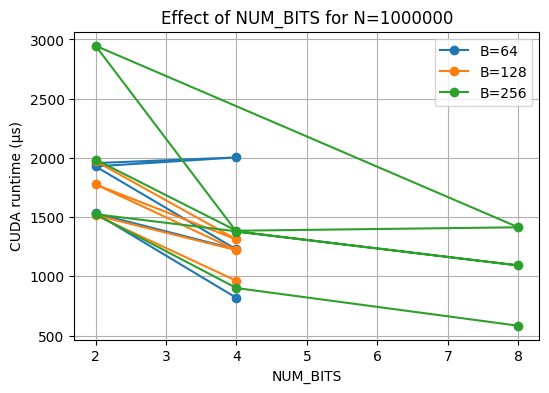

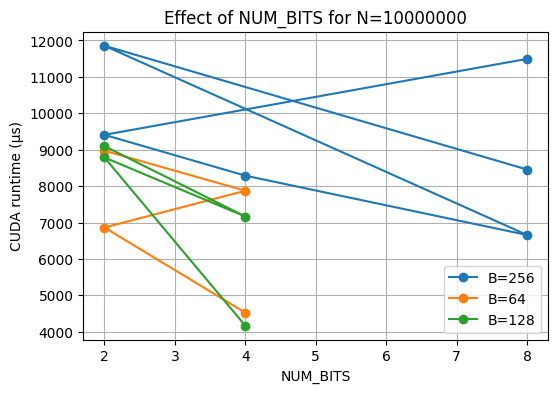

In [7]:
for N in df["N"].unique():
    sub = df[df["N"] == N]
    
    plt.figure(figsize=(6,4))
    for B in sub["B"].unique():
        temp = sub[sub["B"] == B]
        plt.plot(temp["NUM_BITS"], temp["CUDA (µs)"], marker="o", label=f"B={B}")

    plt.title(f"Effect of NUM_BITS for N={N}")
    plt.xlabel("NUM_BITS")
    plt.ylabel("CUDA runtime (µs)")
    plt.legend()
    plt.grid(True)
    plt.show()
